This mini-project is on recognition of Handwritten Digits and the original dataset is the MNIST handwritten digit dataset, which was taken from https://www.kaggle.com/competitions/digit-recognizer, which is part of a competition. The results are evaluated at the Kaggle website only. The goal of this project is simple -- to efficiently recognize as many handwritten digits as possible and compare the performance of various methods. 

**Table of Contents**

**1. Import Libraries and Data**

**2. Standardization and PCA - we are chosing PCA because as we will see shortly, images of handwritten digits only vary in few central pixels. In other words, the pixels near the edges are all black and need not be taken into considerations. For instance, the images are (28 x 28) = 784 pixels and we will use 78 pixels (about 10% of the total) to predict the data.**

**3. Using K -nearest neighbor (KNN) classifier to predict the output**

**4. Using Decision Tree Classifier to predict the output  -- comparison with the KNN classifier.**

**5. Using Support Vector Classifier (SVC) to predict the output -- comparison with the KNN and DT classifiers.**

**6. Conclusion**

# Import Libraries, Load data, Preprocessing etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape, test.shape) # training data has one more column because training data also has the digit that the rest of the 

# data is supposed to represent

(42000, 785) (28000, 784)


In [5]:
print(train.isnull().sum().sum(), test.isnull().sum().sum()) # no missing data, as expected in image files

0 0


We want to demonstrate that the argument presented in favor of doing PCA (in the description at the top) is valid

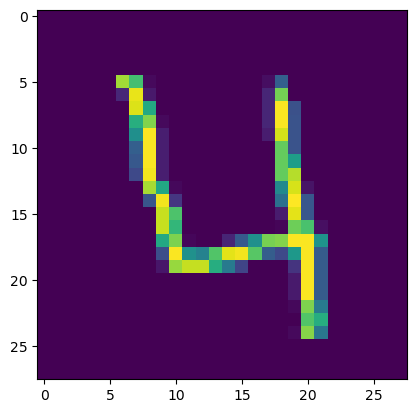

In [6]:
# demonstration of the fourth row and the digit it may represent

dummy = train.iloc[3, 1:]

dummy = np.array(dummy).reshape(28, 28) # convert the series into a horizontal array and then reshape it to (28 x 28)

plt.imshow(dummy) # displays the image that the array - dummy is supposed to represent
plt.show()

As expected, most of the pixels in a given digit are going to be black (numerically 0) and only relatively few pixels are crucial for the determination of the digit (these are pixels in non-black)

For a start, we will take 78 Principal components (roughly 10% of the total number of pixels) and modify our method, if necessitated by performance/efficiency. 

# Standardization and PCA with 78 components

In [7]:
y_train = train.iloc[:,0].values # the first column is the digit label

x_train = train.iloc[:,1:].values # rest of the columns are the pixels of the image

x_test = test.iloc[:,:].values # recall, the test is entirely data and label is to be predicted

In [8]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [9]:
pca_78 = PCA(n_components = 78) # PCA with 78 components initializing

In [10]:
pca_78.fit(x_train) # fitting the input data

PCA(n_components=78)

In [11]:
# Projecting the train_input and test_input onto 78 Principal Components

In [12]:
x_train_78 = pca_78.transform(x_train)
x_test_78 = pca_78.transform(x_test)
print(x_train_78.shape, x_test_78.shape)

(42000, 78) (28000, 78)


Following is a demonstration of five of the images after they have been projected onto 78 principal directions to confirm that the features of digits are preserved - we can clearly see the digits.

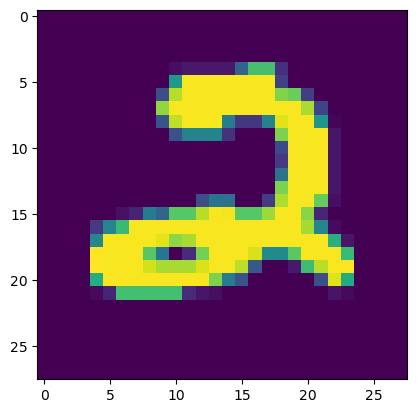

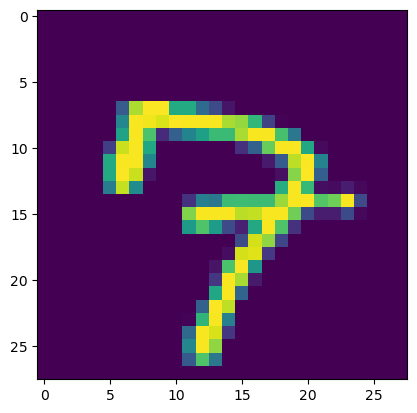

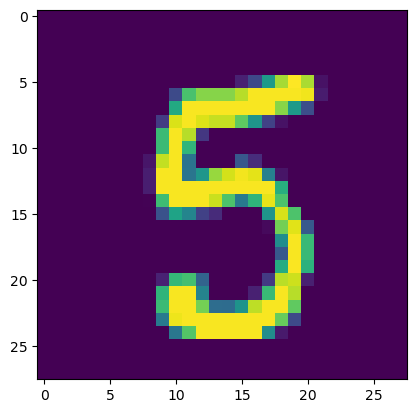

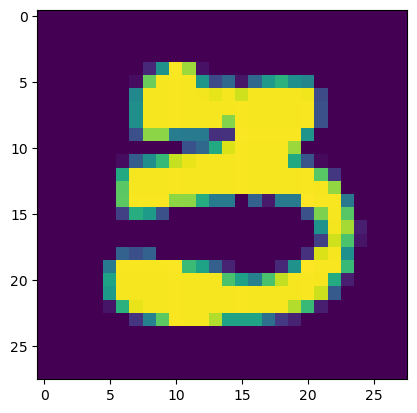

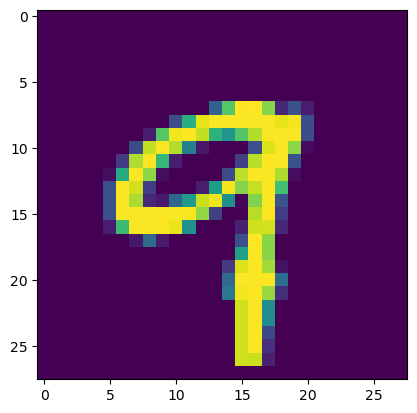

In [28]:
for i in range(5):
    dummy = test.iloc[i*5, :]

    dummy = np.array(dummy).reshape(28, 28) # convert the series into a horizontal array and then reshape it to (28 x 28)

    plt.imshow(dummy) # displays the image that the array - dummy is supposed to represent
    plt.show()

# Using KNN classifier for prediction

In [13]:
knc_5 = KNeighborsClassifier( n_neighbors = 5) # recall that 5 is the default value but we are showing it because we will try

# with n_neighbors = 6 for comparison

In [14]:
knc_5.fit(x_train_78, y_train) # training the KNN classifier

KNeighborsClassifier()

In [15]:
predicted_with_5_neighbors = knc_5.predict(x_test_78)

A demonstration of the prediction

2


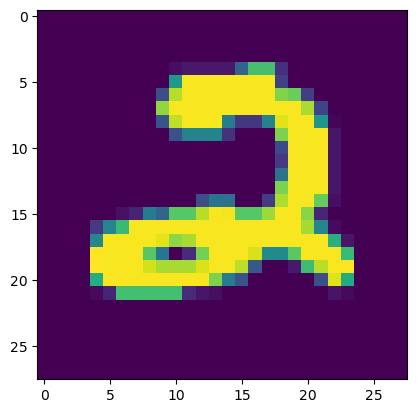

7


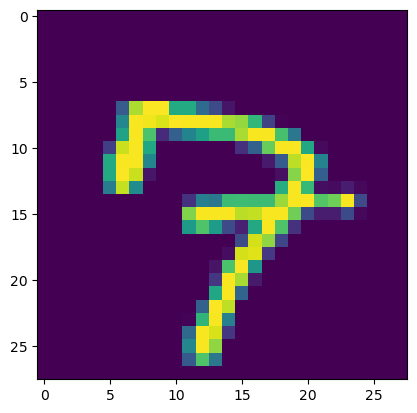

5


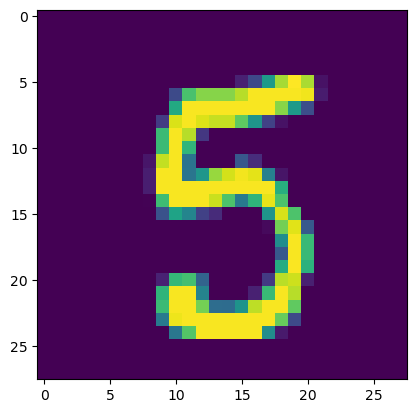

3


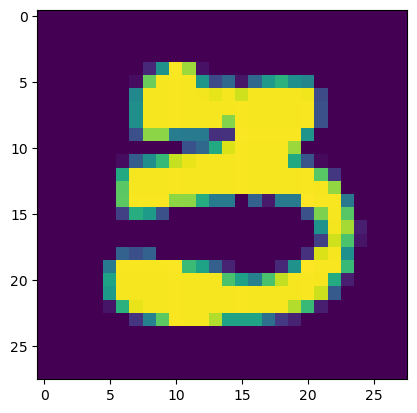

9


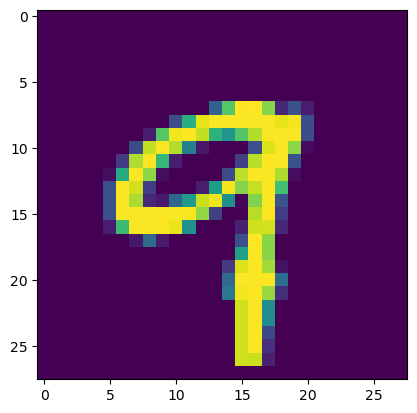

In [16]:
for i in range(5):
    print(predicted_with_5_neighbors[i*5])
    dummy = test.iloc[i*5, :]

    dummy = np.array(dummy).reshape(28, 28) # convert the series into a horizontal array and then reshape it to (28 x 28)

    plt.imshow(dummy) # displays the image that the array - dummy is supposed to represent
    plt.show()

Since we can only test data on Kaggle competition website, let us transform our result into a format specified in the competition

Our result should contain two column headers (ImageID and Label). The ImageID is the row number, but 1-indexed. 
We will convert our result into a 1-indexed dataframe, change the index column's title to ImageID and write it on a CSV file for submission. 

In [17]:
df = pd.DataFrame(predicted_with_5_neighbors)

In [45]:
df.head(2)

,0
0,2
1,0


In [46]:
# increase the index by 1 and rename the column '0' to 'label'

df.index = df.index + 1
df.rename({0:'Label'}, axis = 1, inplace = True)

In [47]:
df.head(2)

,Label
1,2
2,0


In [50]:
df.to_csv('MNIST_78_comp_5_neighbor.csv', index = True, index_label = ['ImageID'])

In [51]:
result_5 = pd.read_csv('MNIST_78_comp_5_neighbor.csv')
result_5.head()

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


When submitted, the accuracy for prediction, with 78 components and 5 nearest neighbors was 97.271%

Let us try the same but this time with 7 nearest neighbors and see whether if there is any improvement

In [18]:
knc_7 = KNeighborsClassifier(n_neighbors = 7) # initialization and training
knc_7.fit(x_train_78, y_train) 

KNeighborsClassifier(n_neighbors=7)

In [19]:
predicted_with_7_neighbors = knc_7.predict(x_test_78) #prediction

In [20]:
df_7 = pd.DataFrame(predicted_with_7_neighbors)

In [21]:
df_7.head(2)

,0
0,2
1,0


In [22]:
df_7.index = df_7.index + 1
df_7.rename(columns = {0 : 'Label'}, inplace = True)

In [23]:
df_7.head()

,Label
1,2
2,0
3,9
4,9
5,3


In [60]:
df_7.to_csv('MNIST_78_comp_7_neighbor.csv', index = True, index_label = ['ImageID'])

In [61]:
result_7 = pd.read_csv('MNIST_78_comp_7_neighbor.csv')
result_7.head()

,ImageID,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


predictions with 5 neighbors and 7 neighbors are different in 225 instances, out of 28000

In [24]:
predicted_with_5_neighbors.size - sum(predicted_with_5_neighbors == predicted_with_7_neighbors)

227

When submitted on Kaggle, the accuracy for prediction, with 78 components and 7 nearest neighbors was 97.150%. Therefore, using more neighbors in KNN did not improve the accuracy. 

# Using DT classifier to measure the performance against the KNN classifier

In [25]:
dt_classifier = DecisionTreeClassifier() #initializing the DT classifier

dt_classifier.fit(x_train_78, y_train) #training the classifier


DecisionTreeClassifier()

In [69]:
predicted_using_DT = dt_classifier.predict(x_test_78)

Even before submitting this result, we want to compare the differences with our best prediction so far

In [70]:
predicted_with_5_neighbors.size - sum(predicted_with_5_neighbors == predicted_using_DT) 

4765

Already, DT_classifer does not look like a good model because it differs from our best result in at least 4765 instances, which is ~17% of the data. Therefore, its efficiency can only be at best 86% and at worst 80%. Therefore, I am not going to ruin my best performance by submitting this result on Kaggle competition. 

# Support Vector Classifier

In [90]:
svc_classifier = SVC() #initialization

svc_classifier.fit(x_train_78, y_train) #training

predicted_svc = svc_classifier.predict(x_test_78) # prediction

we see below that SVC classifier does much better than DT classifier as it only differs from our best result in 649 instances which is ~ 2.1% of the given data. Therefore, the accuracy of our this classifier is at worst ~95% and at best 99.3%. Let us submit this result to Kaggle and find out. 

In [91]:
predicted_svc.size - sum(predicted_svc == predicted_with_5_neighbors) 

649

In [93]:
df_svc = pd.DataFrame(predicted_svc)
df_svc.head(2)

,0
0,2
1,0


In [101]:
df_svc.index = df_svc.index + 1

In [102]:
df_svc.rename(columns = {0:'Label'}, inplace = True)

In [103]:
df_svc.head(2)

,Label
1,2
2,0


In [105]:
df_svc.to_csv('MNIST_with_SVC.csv', index = True, index_label = ['ImageID'])

In [106]:
pd.read_csv('MNIST_with_SVC.csv').head(2)

,ImageID,Label
0,1,2
1,2,0


Upon submission to the Kaggle competition, the accuracy of the SVC classifier is 98.03%, which is (98.03 - 97.27) = 0.76% better, which is about 218 instances. 

# Conclusions:

1. **Reasoning behind doing PCA** - Images of the Handwritten digits from MNIST digits, are more similar to one another than different. For instance, there are 28 x 18 = 784 pixels in each images, but most of those pixels are pitch black and do not contain any information about the digits. In other words, not all 784 features are relevant. 

2. **Reasoning for choosing 78 Principal Components** - In light of the above, we used PCA for feature extraction. We made the choice that the information about the digit is stored in about 10% of the pixels. Hence, we isolated 78 principal components, after standardization, and projected the data onto these principal directions. 

3. **Another reasoning for feature extraction** - Classification algorithms work better in lower-dimensional spaces (curse of dimensionality), when irrelevant and correlated features are eliminated. 

4. **Classification** - We predicted the test data using three different classifiers : (a) KNN classifier (b) Decision Tree classifier and (3) Support Vector classifier (SVC). The test data contained 28000 different handwritten digits. 

5. **Performance** - The SVC classifier worked the best with **98.03%** accuracy, whereas the DT classifier was clearly the worst with its accuracy theoretically bounded above by **86%**. The KNN classifier worked very well too with its accuracy **97.27%**. 

**The conclusion seems to be that both SVC and DT classifier work well for the purpose of recognizing handwritten digits from the MNIST dataset and the percentage accuracy for both of them is quite impressive.**
 